### HEART DISEASE DETECTION

# submitted by: SANIA NASRIN SULTANA
ROLL NO: 170310007045

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.axis.XTick at 0x1b779fe3208>,
 <a list of 14 Text xticklabel objects>)

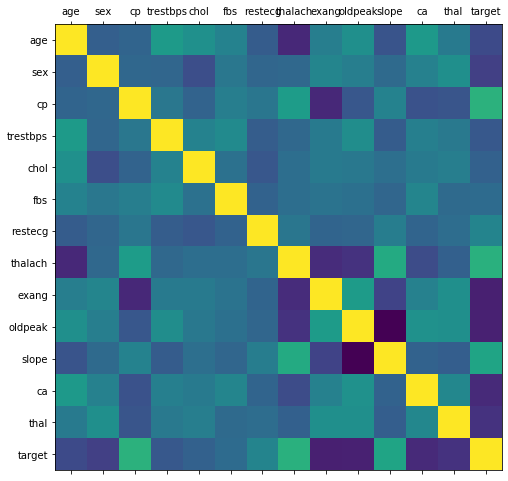

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 15,8
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B77A8B2E48>,
      dtype=object)

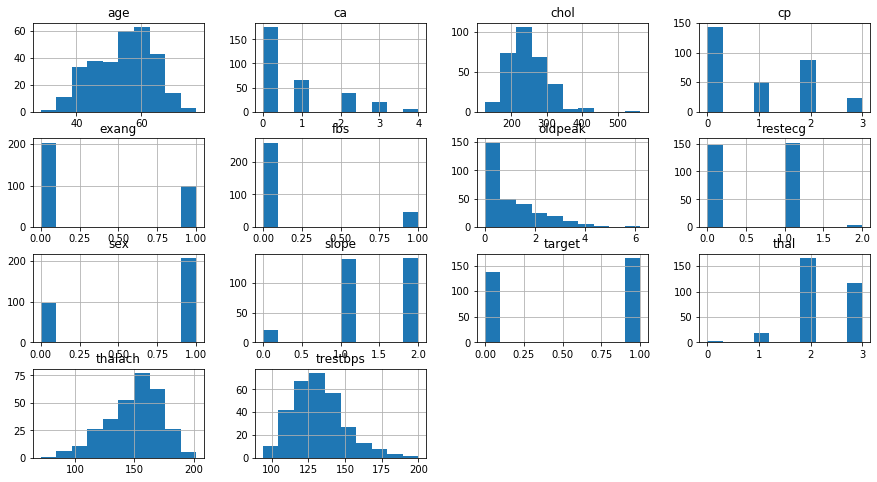

In [11]:
df.hist()

In [12]:
df.shape

(303, 14)

In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
#data preprocessing- feature scaling done 
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [15]:
standardScaler= StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [16]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [17]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values # extracting only the lable and storing it in y

In [18]:
x

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  0.        ,
         1.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         0.        ,  1.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)#80% in train set, 20% in test set

In [21]:
print(x_train.astype('int'))

[[ 0  0  0 ...  0  0  0]
 [ 0 -1  0 ...  0  0  1]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  0 -1 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]]


##### DECISION TREE CLASSIFIER

In [53]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='entropy',max_depth=7)
dc = dc.fit(x_train, y_train)
pred=dc.predict(x_test)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0]


In [55]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)  #prediction percentage of the model
print(str(acc*100)+ " % "+ "accuracy by Decision tree classifier")
u = acc*100

100.0 % accuracy by Decision tree classifier


##### RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5)

In [57]:
forest = forest.fit(x_train, y_train)
pred1 = forest.predict(x_test)
print(pred1)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0]


In [58]:
acc1 = accuracy_score(y_test, pred1)  #prediction percentage of the model
print(str(acc1*100)+ " % "+ "accuracy by Random Forest classifier")
v = acc1*100

96.05263157894737 % accuracy by Random Forest classifier


##### K NEAREST NEIGHBOUR

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KSCORE = []
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors=k) 
    knn_classifier.fit(x_train, y_train)
    KSCORE.append(knn_classifier.score(x_test,y_test))

In [60]:
kscore = [round(num,2) for num in KSCORE]
print(kscore)

[0.74, 0.71, 0.8, 0.78, 0.79, 0.82, 0.8, 0.79, 0.8, 0.8, 0.82, 0.82, 0.82, 0.8, 0.82, 0.78, 0.79, 0.79, 0.79, 0.79, 0.8, 0.76, 0.76, 0.75, 0.76, 0.75, 0.75, 0.74, 0.76, 0.76, 0.76, 0.75, 0.75, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.76, 0.75, 0.76, 0.75, 0.75, 0.75, 0.76, 0.76, 0.76]


Text(0.5, 1.0, 'visualizing knn classifer score for differnt values of k')

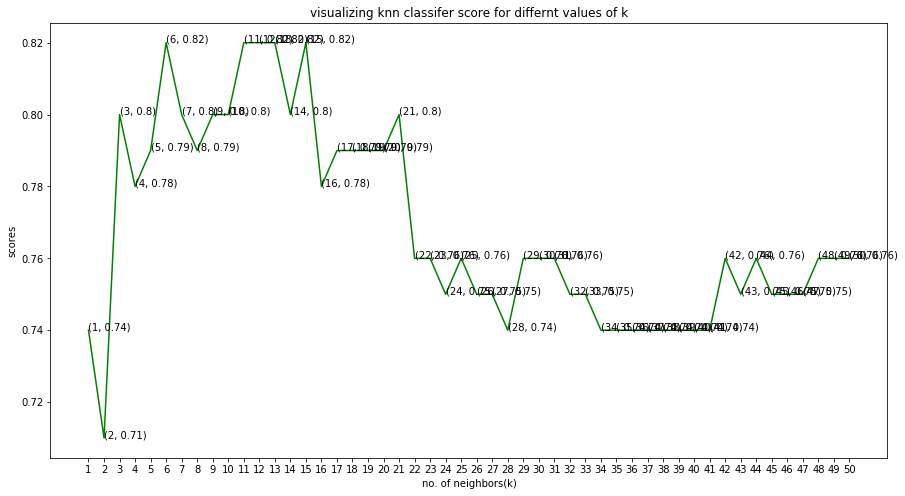

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)
plt.plot([k for k in range(1,51)], kscore, color ='green')
for i in range(1,51):
    plt.text(i, kscore[i-1], (i, kscore[i-1]) )   
plt.xticks([i for i in range(1,51)])
plt.xlabel('no. of neighbors(k)')
plt.ylabel('scores')
plt.title('visualizing knn classifer score for differnt values of k')

In [62]:
print(str(max(kscore)*100) + " %  accuracy by KNN classifier" )  #from graph we can see that we get max accuracy at k=42 and k=44
w = max(kscore)*100

82.0 %  accuracy by KNN classifier


 ##### SUPPORT VECTOR CLASSIFIER

In [63]:
from sklearn.svm import SVC

In [64]:
sc = SVC(kernel= 'linear')
sc1 = sc.fit(x_train, y_train)

In [65]:
pred4 = sc1.predict(x_test)

In [66]:
acc4 = accuracy_score(y_test, pred4)

print(str(acc4*100)+ " % "+ "accuracy by SVC , kernel = linear")
z = acc4*100

100.0 % accuracy by SVC , kernel = linear


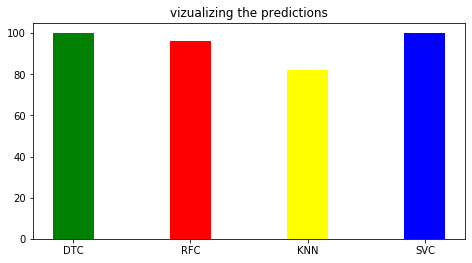

In [67]:
plt.rcParams['figure.figsize'] = (6,3)
fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.set_title("vizualizing the predictions")
a.bar('DTC', u, color='green', width= 0.35)
a.bar('RFC', v, color='red', width=0.35)
a.bar('KNN', w, color='yellow', width=0.35)
a.bar('SVC', z, color='blue',width=0.35)

plt.show()

 #### from above bar graph we can visualize that random forest classifier (RFC) bar is tallest hence the best fit to this data for prediction       
